# This workbook contains the models trained using data without 'default column'

In [1]:
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv(r"C:\Users\akshayd6\Desktop\MyModels\Loan Default Prediction Capstone\Dataset without default.csv",index_col = 'Customer_id')

In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [6]:
df.tail()

,age,employee_variation_rate,consumer_price_index,consumer_confidence_index,euribor,number_employed,duration,job,education,marital__married,marital__single,housing__yes,contact__telephone,Campaign_month__aug,Campaign_month__dec,Campaign_month__jul,Campaign_month__jun,Campaign_month__mar,Campaign_month__may,Campaign_month__nov,Campaign_month__oct,Campaign_month__sep,day_of_week__mon,day_of_week__thu,day_of_week__tue,day_of_week__wed,campaign__2,campaign__3,campaign__4,campaign__5,campaign__6,campaign__7,campaign__8,campaign__9,campaign__10,campaign__11,campaign__12,campaign__13,campaign__14,campaign__15,campaign__16,campaign__17,campaign__18,campaign__19,campaign__20,campaign__21,campaign__22,campaign__23,campaign__24,campaign__25,campaign__26,campaign__27,campaign__28,campaign__29,campaign__30,campaign__31,campaign__32,campaign__33,campaign__34,campaign__35,campaign__37,campaign__39,campaign__40,campaign__41,campaign__42,campaign__43,campaign__56,previous__1,previous__2,previous__3,previous__4,previous__5,previous__6,previous__7,Aberdeen,Abilene,Akron,Albuquerque,Alexandria,Allen,Allentown,Altoona,Amarillo,Anaheim,Andover,Ann Arbor,Antioch,Apopka,Apple Valley,Appleton,Arlington,Arlington Heights,Arvada,Asheville,Athens,Atlanta,Atlantic City,Auburn,Aurora,Austin,Avondale,Bakersfield,Baltimore,Bangor,Bartlett,Bayonne,Baytown,Beaumont,Bedford,Belleville,Bellevue,Bellingham,Bethlehem,Beverly,Billings,Bloomington,Boca Raton,Boise,Bolingbrook,Bossier City,Bowling Green,Boynton Beach,Bozeman,Brentwood,Bridgeton,Bristol,Broken Arrow,Broomfield,Brownsville,Bryan,Buffalo,Buffalo Grove,Bullhead City,Burbank,Burlington,Caldwell,Camarillo,Cambridge,Canton,Carlsbad,Carol Stream,Carrollton,Cary,Cedar Hill,Cedar Rapids,Champaign,Chandler,Chapel Hill,Charlotte,Charlottesville,Chattanooga,Chesapeake,Chester,Cheyenne,Chicago,Chico,Chula Vista,Cincinnati,Citrus Heights,Clarksville,Cleveland,Clifton,Clinton,Clovis,Coachella,College Station,Colorado Springs,Columbia,Columbus,Commerce City,Concord,Conroe,Conway,Coon Rapids,Coppell,Coral Gables,Coral Springs,Corpus Christi,Costa Mesa,Cottage Grove,Covington,Cranston,Cuyahoga Falls,Dallas,Danbury,Danville,Davis,Daytona Beach,Dearborn,Dearborn Heights,Decatur,Deer Park,Delray Beach,Deltona,Denver,Des Moines,Des Plaines,Detroit,Dover,Draper,Dublin,Dubuque,Durham,Eagan,East Orange,East Point,Eau Claire,Edinburg,Edmond,Edmonds,El Cajon,El Paso,Elkhart,Elmhurst,Elyria,Encinitas,Englewood,Escondido,Eugene,Evanston,Everett,Fairfield,Fargo,Farmington,Fayetteville,Florence,Fort Collins,Fort Lauderdale,Fort Worth,Frankfort,Franklin,Freeport,Fremont,Fresno,Frisco,Gaithersburg,Garden City,Garland,Gastonia,Georgetown,Gilbert,Gladstone,Glendale,Glenview,Goldsboro,Grand Island,Grand Prairie,Grand Rapids,Grapevine,Great Falls,Greeley,Green Bay,Greensboro,Greenville,Greenwood,Gresham,Grove City,Gulfport,Hackensack,Hagerstown,Haltom City,Hamilton,Hampton,Harlingen,Harrisonburg,Hattiesburg,Helena,Hempstead,Henderson,Hendersonville,Hesperia,Hialeah,Hickory,Highland Park,Hillsboro,Holland,Hollywood,Holyoke,Homestead,Hoover,Hot Springs,Houston,Huntington Beach,Huntsville,Independence,Indianapolis,Inglewood,Iowa City,Irving,Jackson,Jacksonville,Jamestown,Jefferson City,Johnson City,Jonesboro,Jupiter,Keller,Kenner,Kenosha,Kent,Kirkwood,Kissimmee,Knoxville,La Crosse,La Mesa,La Porte,La Quinta,Lafayette,Laguna Niguel,Lake Charles,Lake Elsinore,Lake Forest,Lakeland,Lakeville,Lakewood,Lancaster,Lansing,Laredo,Las Cruces,Las Vegas,Laurel,Lawrence,Lawton,Layton,League City,Lebanon,Lehi,Leominster,Lewiston,Lincoln Park,Linden,Lindenhurst,Little Rock,Littleton,Lodi,Logan,Long Beach,Longmont,Longview,Lorain,Los Angeles,Louisville,Loveland,Lowell,Lubbock,Macon,Madison,Malden,Manchester,Manhattan,Mansfield,Manteca,Maple Grove,Margate,Marietta,Marion,Marlborough,Marysville,Mason,Mcallen,Medford,Medina,Melbourne,Memphis,Mentor,Meriden,Meridian,Mesa,Mesquite,Miami,Middletown,Midland,Milford,Milwaukee,Minneapolis,Miramar,Mishawaka,Mission 

In [7]:
df.shape

(37084, 606)

In [8]:
df.target.value_counts(normalize = True)

0    0.886528
1    0.113472
Name: target, dtype: float64

>We are going to train the model by using scaled and unscalled data and compare difference in accuracy.

## Scaling the data

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
num_columns = ['age','employee_variation_rate','consumer_price_index','consumer_confidence_index','euribor',
              'number_employed','duration']
cat_columns = ['job','marital','education','default','housing','contact','Campaign_month',
          'day_of_week','campaign','previous','City_Name']

In [11]:
tb_scaled = df[num_columns]

In [12]:
tb_scaled.head()

,age,employee_variation_rate,consumer_price_index,consumer_confidence_index,euribor,number_employed,duration
Customer_id,,,,,,,
1,56,1.1,93.994,-36.4,4.857,5191.0,307
2,45,1.1,93.994,-36.4,4.857,5191.0,198
3,59,1.1,93.994,-36.4,4.857,5191.0,139
4,41,1.1,93.994,-36.4,4.857,5191.0,217
5,24,1.1,93.994,-36.4,4.857,5191.0,380


In [13]:
scaler = StandardScaler()
scaler.fit(tb_scaled)
scaled = scaler.transform(tb_scaled)

In [14]:
scaled_num_columns = pd.DataFrame(scaled)
scaled_num_columns = scaled_num_columns.set_index(df.index)

In [15]:
scaled_num_columns.head()

,0,1,2,3,4,5,6
Customer_id,,,,,,,
1,1.586388,0.648404,0.722446,0.888187,0.712439,0.331618,0.404735
2,0.499122,0.648404,0.722446,0.888187,0.712439,0.331618,-0.208708
3,1.882915,0.648404,0.722446,0.888187,0.712439,0.331618,-0.540755
4,0.103752,0.648404,0.722446,0.888187,0.712439,0.331618,-0.101778
5,-1.576569,0.648404,0.722446,0.888187,0.712439,0.331618,0.815573


In [16]:
unscaled = df.copy()
unscaled.drop(columns = num_columns,inplace = True)

In [17]:
unscaled.head()

,job,education,marital__married,marital__single,housing__yes,contact__telephone,Campaign_month__aug,Campaign_month__dec,Campaign_month__jul,Campaign_month__jun,Campaign_month__mar,Campaign_month__may,Campaign_month__nov,Campaign_month__oct,Campaign_month__sep,day_of_week__mon,day_of_week__thu,day_of_week__tue,day_of_week__wed,campaign__2,campaign__3,campaign__4,campaign__5,campaign__6,campaign__7,campaign__8,campaign__9,campaign__10,campaign__11,campaign__12,campaign__13,campaign__14,campaign__15,campaign__16,campaign__17,campaign__18,campaign__19,campaign__20,campaign__21,campaign__22,campaign__23,campaign__24,campaign__25,campaign__26,campaign__27,campaign__28,campaign__29,campaign__30,campaign__31,campaign__32,campaign__33,campaign__34,campaign__35,campaign__37,campaign__39,campaign__40,campaign__41,campaign__42,campaign__43,campaign__56,previous__1,previous__2,previous__3,previous__4,previous__5,previous__6,previous__7,Aberdeen,Abilene,Akron,Albuquerque,Alexandria,Allen,Allentown,Altoona,Amarillo,Anaheim,Andover,Ann Arbor,Antioch,Apopka,Apple Valley,Appleton,Arlington,Arlington Heights,Arvada,Asheville,Athens,Atlanta,Atlantic City,Auburn,Aurora,Austin,Avondale,Bakersfield,Baltimore,Bangor,Bartlett,Bayonne,Baytown,Beaumont,Bedford,Belleville,Bellevue,Bellingham,Bethlehem,Beverly,Billings,Bloomington,Boca Raton,Boise,Bolingbrook,Bossier City,Bowling Green,Boynton Beach,Bozeman,Brentwood,Bridgeton,Bristol,Broken Arrow,Broomfield,Brownsville,Bryan,Buffalo,Buffalo Grove,Bullhead City,Burbank,Burlington,Caldwell,Camarillo,Cambridge,Canton,Carlsbad,Carol Stream,Carrollton,Cary,Cedar Hill,Cedar Rapids,Champaign,Chandler,Chapel Hill,Charlotte,Charlottesville,Chattanooga,Chesapeake,Chester,Cheyenne,Chicago,Chico,Chula Vista,Cincinnati,Citrus Heights,Clarksville,Cleveland,Clifton,Clinton,Clovis,Coachella,College Station,Colorado Springs,Columbia,Columbus,Commerce City,Concord,Conroe,Conway,Coon Rapids,Coppell,Coral Gables,Coral Springs,Corpus Christi,Costa Mesa,Cottage Grove,Covington,Cranston,Cuyahoga Falls,Dallas,Danbury,Danville,Davis,Daytona Beach,Dearborn,Dearborn Heights,Decatur,Deer Park,Delray Beach,Deltona,Denver,Des Moines,Des Plaines,Detroit,Dover,Draper,Dublin,Dubuque,Durham,Eagan,East Orange,East Point,Eau Claire,Edinburg,Edmond,Edmonds,El Cajon,El Paso,Elkhart,Elmhurst,Elyria,Encinitas,Englewood,Escondido,Eugene,Evanston,Everett,Fairfield,Fargo,Farmington,Fayetteville,Florence,Fort Collins,Fort Lauderdale,Fort Worth,Frankfort,Franklin,Freeport,Fremont,Fresno,Frisco,Gaithersburg,Garden City,Garland,Gastonia,Georgetown,Gilbert,Gladstone,Glendale,Glenview,Goldsboro,Grand Island,Grand Prairie,Grand Rapids,Grapevine,Great Falls,Greeley,Green Bay,Greensboro,Greenville,Greenwood,Gresham,Grove City,Gulfport,Hackensack,Hagerstown,Haltom City,Hamilton,Hampton,Harlingen,Harrisonburg,Hattiesburg,Helena,Hempstead,Henderson,Hendersonville,Hesperia,Hialeah,Hickory,Highland Park,Hillsboro,Holland,Hollywood,Holyoke,Homestead,Hoover,Hot Springs,Houston,Huntington Beach,Huntsville,Independence,Indianapolis,Inglewood,Iowa City,Irving,Jackson,Jacksonville,Jamestown,Jefferson City,Johnson City,Jonesboro,Jupiter,Keller,Kenner,Kenosha,Kent,Kirkwood,Kissimmee,Knoxville,La Crosse,La Mesa,La Porte,La Quinta,Lafayette,Laguna Niguel,Lake Charles,Lake Elsinore,Lake Forest,Lakeland,Lakeville,Lakewood,Lancaster,Lansing,Laredo,Las Cruces,Las Vegas,Laurel,Lawrence,Lawton,Layton,League City,Lebanon,Lehi,Leominster,Lewiston,Lincoln Park,Linden,Lindenhurst,Little Rock,Littleton,Lodi,Logan,Long Beach,Longmont,Longview,Lorain,Los Angeles,Louisville,Loveland,Lowell,Lubbock,Macon,Madison,Malden,Manchester,Manhattan,Mansfield,Manteca,Maple Grove,Margate,Marietta,Marion,Marlborough,Marysville,Mason,Mcallen,Medford,Medina,Melbourne,Memphis,Mentor,Meriden,Meridian,Mesa,Mesquite,Miami,Middletown,Midland,Milford,Milwaukee,Minneapolis,Miramar,Mishawaka,Mission Viejo,Missoula,Missouri City,Mobile,Modesto,Monroe,Montebello,Montgomery,Moorhead,Moreno Valley,Morgan Hill,

In [18]:
scaled_data = pd.concat([scaled_num_columns,unscaled],axis = 1)

In [19]:
scaled_data.rename(columns = {0:'age',1:'employee_variation_rate',2:'consumer_price_index',
                             3:'consumer_confidence_index',4:'euribor',5:'number_employed',6:'duration'},inplace = True)

In [20]:
scaled_data.tail()

,age,employee_variation_rate,consumer_price_index,consumer_confidence_index,euribor,number_employed,duration,job,education,marital__married,marital__single,housing__yes,contact__telephone,Campaign_month__aug,Campaign_month__dec,Campaign_month__jul,Campaign_month__jun,Campaign_month__mar,Campaign_month__may,Campaign_month__nov,Campaign_month__oct,Campaign_month__sep,day_of_week__mon,day_of_week__thu,day_of_week__tue,day_of_week__wed,campaign__2,campaign__3,campaign__4,campaign__5,campaign__6,campaign__7,campaign__8,campaign__9,campaign__10,campaign__11,campaign__12,campaign__13,campaign__14,campaign__15,campaign__16,campaign__17,campaign__18,campaign__19,campaign__20,campaign__21,campaign__22,campaign__23,campaign__24,campaign__25,campaign__26,campaign__27,campaign__28,campaign__29,campaign__30,campaign__31,campaign__32,campaign__33,campaign__34,campaign__35,campaign__37,campaign__39,campaign__40,campaign__41,campaign__42,campaign__43,campaign__56,previous__1,previous__2,previous__3,previous__4,previous__5,previous__6,previous__7,Aberdeen,Abilene,Akron,Albuquerque,Alexandria,Allen,Allentown,Altoona,Amarillo,Anaheim,Andover,Ann Arbor,Antioch,Apopka,Apple Valley,Appleton,Arlington,Arlington Heights,Arvada,Asheville,Athens,Atlanta,Atlantic City,Auburn,Aurora,Austin,Avondale,Bakersfield,Baltimore,Bangor,Bartlett,Bayonne,Baytown,Beaumont,Bedford,Belleville,Bellevue,Bellingham,Bethlehem,Beverly,Billings,Bloomington,Boca Raton,Boise,Bolingbrook,Bossier City,Bowling Green,Boynton Beach,Bozeman,Brentwood,Bridgeton,Bristol,Broken Arrow,Broomfield,Brownsville,Bryan,Buffalo,Buffalo Grove,Bullhead City,Burbank,Burlington,Caldwell,Camarillo,Cambridge,Canton,Carlsbad,Carol Stream,Carrollton,Cary,Cedar Hill,Cedar Rapids,Champaign,Chandler,Chapel Hill,Charlotte,Charlottesville,Chattanooga,Chesapeake,Chester,Cheyenne,Chicago,Chico,Chula Vista,Cincinnati,Citrus Heights,Clarksville,Cleveland,Clifton,Clinton,Clovis,Coachella,College Station,Colorado Springs,Columbia,Columbus,Commerce City,Concord,Conroe,Conway,Coon Rapids,Coppell,Coral Gables,Coral Springs,Corpus Christi,Costa Mesa,Cottage Grove,Covington,Cranston,Cuyahoga Falls,Dallas,Danbury,Danville,Davis,Daytona Beach,Dearborn,Dearborn Heights,Decatur,Deer Park,Delray Beach,Deltona,Denver,Des Moines,Des Plaines,Detroit,Dover,Draper,Dublin,Dubuque,Durham,Eagan,East Orange,East Point,Eau Claire,Edinburg,Edmond,Edmonds,El Cajon,El Paso,Elkhart,Elmhurst,Elyria,Encinitas,Englewood,Escondido,Eugene,Evanston,Everett,Fairfield,Fargo,Farmington,Fayetteville,Florence,Fort Collins,Fort Lauderdale,Fort Worth,Frankfort,Franklin,Freeport,Fremont,Fresno,Frisco,Gaithersburg,Garden City,Garland,Gastonia,Georgetown,Gilbert,Gladstone,Glendale,Glenview,Goldsboro,Grand Island,Grand Prairie,Grand Rapids,Grapevine,Great Falls,Greeley,Green Bay,Greensboro,Greenville,Greenwood,Gresham,Grove City,Gulfport,Hackensack,Hagerstown,Haltom City,Hamilton,Hampton,Harlingen,Harrisonburg,Hattiesburg,Helena,Hempstead,Henderson,Hendersonville,Hesperia,Hialeah,Hickory,Highland Park,Hillsboro,Holland,Hollywood,Holyoke,Homestead,Hoover,Hot Springs,Houston,Huntington Beach,Huntsville,Independence,Indianapolis,Inglewood,Iowa City,Irving,Jackson,Jacksonville,Jamestown,Jefferson City,Johnson City,Jonesboro,Jupiter,Keller,Kenner,Kenosha,Kent,Kirkwood,Kissimmee,Knoxville,La Crosse,La Mesa,La Porte,La Quinta,Lafayette,Laguna Niguel,Lake Charles,Lake Elsinore,Lake Forest,Lakeland,Lakeville,Lakewood,Lancaster,Lansing,Laredo,Las Cruces,Las Vegas,Laurel,Lawrence,Lawton,Layton,League City,Lebanon,Lehi,Leominster,Lewiston,Lincoln Park,Linden,Lindenhurst,Little Rock,Littleton,Lodi,Logan,Long Beach,Longmont,Longview,Lorain,Los Angeles,Louisville,Loveland,Lowell,Lubbock,Macon,Madison,Malden,Manchester,Manhattan,Mansfield,Manteca,Maple Grove,Margate,Marietta,Marion,Marlborough,Marysville,Mason,Mcallen,Medford,Medina,Melbourne,Memphis,Mentor,Meriden,Meridian,Mesa,Mesquite,Miami,Middletown,Midland,Milford,Milwaukee,Minneapolis,Miramar,Mishawaka,Mission 

## Test Train split - Unscaled data

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X = df.drop(columns = ['target'],axis = 1)
y = df['target']

In [23]:
print("X-shape:",X.shape)
print("y-shape:",y.shape)

X-shape: (37084, 605)
y-shape: (37084,)


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state = 42)

In [25]:
print(y_train.value_counts())
print(y_train.value_counts(normalize = True))

0    24599
1     3214
Name: target, dtype: int64
0    0.884443
1    0.115557
Name: target, dtype: float64


>Here we can see that the target variable is imbalaced ~88% - no and ~12% - yes. So we must make this a balanced sample by using SMOTE.

## Test Train split - Scaled data

In [26]:
X1 = scaled_data.drop(columns = ['target'],axis = 1)
y1 = scaled_data['target']

In [27]:
print("X-shape:",X1.shape)
print("y-shape:",y1.shape)

X-shape: (37084, 605)
y-shape: (37084,)


In [28]:
sX_train, sX_test, sy_train, sy_test = train_test_split(X1, y1, test_size=0.25,random_state = 42)

In [29]:
print(sy_train.value_counts())
print(sy_train.value_counts(normalize = True))

0    24599
1     3214
Name: target, dtype: int64
0    0.884443
1    0.115557
Name: target, dtype: float64


>Here we can see that the target variable is imbalaced ~88% - no and ~12% - yes. So we must make this a balanced sample by using SMOTE.

## SMOTE for unscaled data

In [30]:
from imblearn.over_sampling import SMOTE 

In [31]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [32]:
print("X-shape:",X_res.shape)
print("y-shape:",y_res.shape)

X-shape: (49198, 605)
y-shape: (49198,)


In [33]:
print(y_res.value_counts())
print(y_res.value_counts(normalize = True))

0    24599
1    24599
Name: target, dtype: int64
0    0.5
1    0.5
Name: target, dtype: float64


>Here the data was oversampled and now the ratio of yes:no is 1:1

## SMOTE for scaled data

In [34]:
sm1 = SMOTE(random_state=42)
sX_res, sy_res = sm1.fit_resample(sX_train, sy_train)

In [35]:
print("X-shape:",sX_res.shape)
print("y-shape:",sy_res.shape)

X-shape: (49198, 605)
y-shape: (49198,)


In [36]:
print(y_res.value_counts())
print(y_res.value_counts(normalize = True))

0    24599
1    24599
Name: target, dtype: int64
0    0.5
1    0.5
Name: target, dtype: float64


>Here the data was oversampled and now the ratio of yes:no is 1:1

## Logistic Regression using unscaled data

In [37]:
y_res.value_counts()

0    24599
1    24599
Name: target, dtype: int64

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
lr = LogisticRegression()
lr.fit(X_res,y_res)

LogisticRegression()

In [40]:
lr.score(X_test,y_test)

0.8235357566605545

### Classification Report

In [41]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [42]:
lr_preds = lr.predict(X_test)

In [43]:
print(classification_report(y_test, lr_preds))

              precision    recall  f1-score   support

           0       0.98      0.82      0.89      8277
           1       0.37      0.89      0.52       994

    accuracy                           0.82      9271
   macro avg       0.68      0.85      0.71      9271
weighted avg       0.92      0.82      0.85      9271



### Confusion martrix

In [44]:
cm = confusion_matrix(y_test,lr_preds)
conf_mat = pd.DataFrame(cm,index = ['True(0)','True(1)'],columns = ['Predicted(0)','Predicted(1)'])
conf_mat

,Predicted(0),Predicted(1)
True(0),6746,1531
True(1),105,889


### ROC_AUC - Unscaled LR model

In [45]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

optimal threshold:  0.5320993821527595


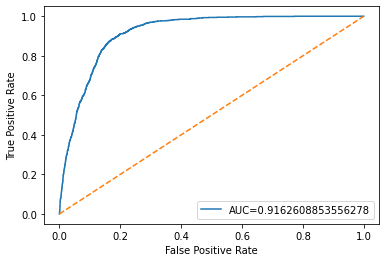

In [46]:
y_pred_proba = lr.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

#blue_line
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr,_ = roc_curve(y_test, random_probs, pos_label=1)

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

print("optimal threshold: ",optimal_threshold)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.plot(p_fpr, p_tpr, linestyle='--')
plt.show()

## Logistic Regression using scaled data

In [49]:
lr1 = LogisticRegression()
lr1.fit(sX_res,sy_res)

LogisticRegression()

In [50]:
lr1.score(sX_test,sy_test)

0.8757415597022975

>Scaled data gives more accuracy when compared to unscalled data.

### Classification Report

In [51]:
lr1_preds = lr1.predict(sX_test)

In [52]:
print(classification_report(sy_test, lr1_preds))

              precision    recall  f1-score   support

           0       0.95      0.90      0.93      8277
           1       0.44      0.63      0.52       994

    accuracy                           0.88      9271
   macro avg       0.70      0.77      0.73      9271
weighted avg       0.90      0.88      0.88      9271



### Confusion Matrix

In [53]:
cm = confusion_matrix(sy_test,lr1_preds)
conf_mat = pd.DataFrame(cm,index = ['True(0)','True(1)'],columns = ['Predicted(0)','Predicted(1)'])
conf_mat

,Predicted(0),Predicted(1)
True(0),7490,787
True(1),365,629


### ROC_AUC - Scaled LR model

optimal threshold:  0.17064540150773777


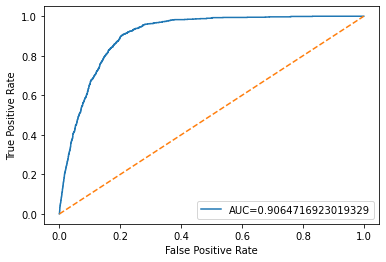

In [54]:
sy_pred_proba = lr1.predict_proba(sX_test)[:,1]
fpr1, tpr1, thresholds = roc_curve(sy_test,  sy_pred_proba)
auc1 = roc_auc_score(sy_test, sy_pred_proba)

#blue_line
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

optimal_idx = np.argmax(tpr1 - fpr1)
optimal_threshold = thresholds[optimal_idx]

print("optimal threshold: ",optimal_threshold)
#create ROC curve
plt.plot(fpr1,tpr1,label="AUC="+str(auc1))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.plot(p_fpr, p_tpr, linestyle='--')
plt.show()

In [55]:
np.argmax(fpr1-tpr1)

1

## Random Forest

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
rf = RandomForestClassifier()

In [58]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [59]:
rf.score(X_test,y_test)

0.912738647395103

In [60]:
rf_preds = rf.predict(X_test)

In [61]:
print(classification_report(y_test, rf_preds))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      8277
           1       0.64      0.43      0.51       994

    accuracy                           0.91      9271
   macro avg       0.79      0.70      0.73      9271
weighted avg       0.90      0.91      0.91      9271



### Confusion Matrix RF

In [62]:
cm = confusion_matrix(y_test,rf_preds)
conf_mat = pd.DataFrame(cm,index = ['True(0)','True(1)'],columns = ['Predicted(0)','Predicted(1)'])
conf_mat

,Predicted(0),Predicted(1)
True(0),8035,242
True(1),567,427


### ROC Curve - RF

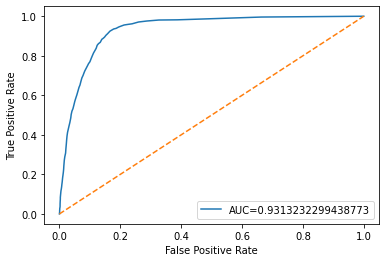

In [63]:
y_pred_proba = rf.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

#blue_line
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.plot(p_fpr, p_tpr, linestyle='--')
plt.show()

## KNN Classifier

In [64]:
from sklearn.neighbors import KNeighborsClassifier

In [65]:
knn = KNeighborsClassifier()

In [66]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [67]:
knn.score(X_test,y_test)

0.9013051450760435

In [68]:
knn_preds = knn.predict(X_test)

In [69]:
print(classification_report(y_test, knn_preds))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      8277
           1       0.55      0.48      0.51       994

    accuracy                           0.90      9271
   macro avg       0.74      0.71      0.73      9271
weighted avg       0.90      0.90      0.90      9271



### Confusion Matrix - KNN

In [70]:
cm = confusion_matrix(y_test,knn_preds)
conf_mat = pd.DataFrame(cm,index = ['True(0)','True(1)'],columns = ['Predicted(0)','Predicted(1)'])
conf_mat

,Predicted(0),Predicted(1)
True(0),7883,394
True(1),521,473


### ROC Curve - KNN

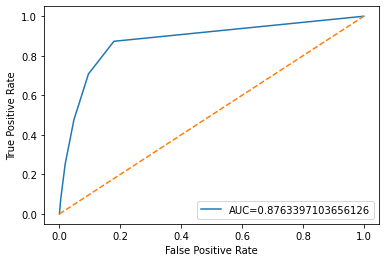

In [71]:
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

#blue_line
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.plot(p_fpr, p_tpr, linestyle='--')
plt.show()

## Comparison of models and model selection

><b>Precison</b> - Precision is calculated by dividing the true positives by anything that was predicted as a positive.<br>
<b>Recall</b> - Recall is calculated by dividing the true positives by anything that should have been predicted as positive.

In this particular use-case, it is important to identify the peple who are at a greater risk of deafulting, than the people who won't default.<br><br>
<i><b>Note:</b></i> It is better to predict people who won't deafult as 'will default', than predicting people who will default as 'won't default'. This is the reason why we consider recall instead of accuracy.

1. Logistic Regression: From the classification report of the Logsitic regression model trained using unscaled data, it can be observed that the recall for class 1 is 0.89, which is great.
2. Random forest classifier yields the higest accuracy among all the trained models. Although this might be due to the fact that it predicts more 0s when compared to the 1s. Since the 0 class is the majority class here this will incerase the accuracy. 
3. Conclusion similar to that of random forest can be obtained.

<b>Coclusion:</b>
We conclude that the Logistic regression model with unscaled data is the better model among the four models.

## Model Explainability

In [72]:
import shap

In [73]:
feature_names = list(X_train.columns)

In [74]:
explainer = shap.Explainer(lr, X_train, feature_names = feature_names)
shap_values = explainer(X_test)

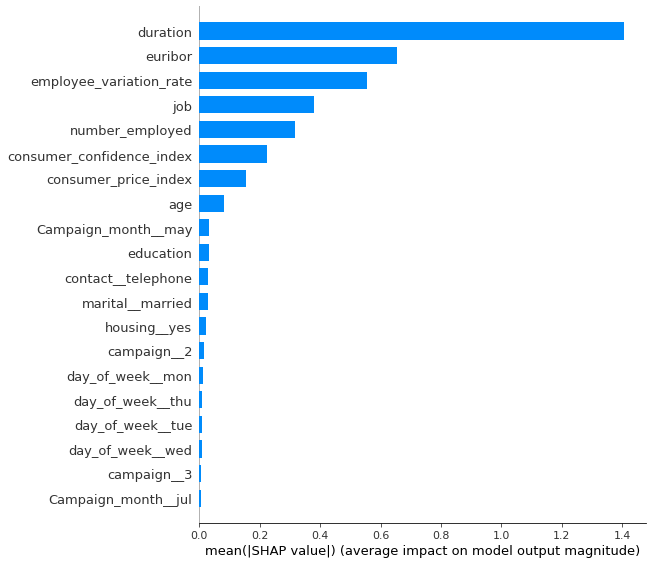

In [75]:
shap.summary_plot(shap_values,feature_names = feature_names,plot_type = 'bar')

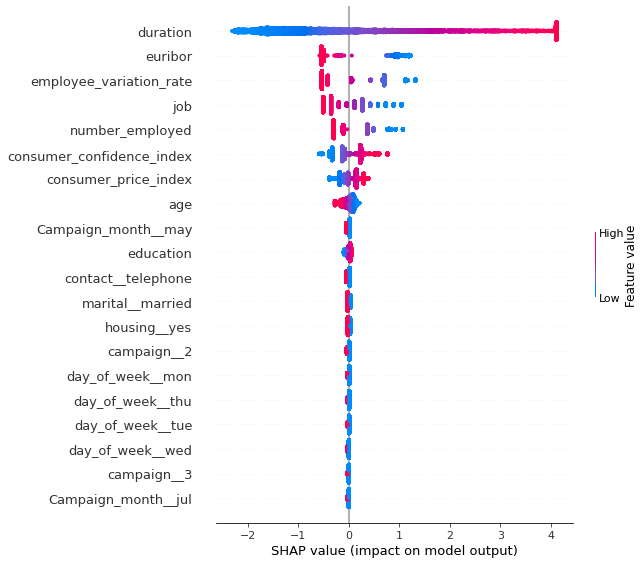

In [76]:
shap.summary_plot(shap_values,feature_names = feature_names,plot_type = 'dot')